<a href="https://colab.research.google.com/github/warisaaom/KKU_Data_Mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Generate Data

In [130]:
from sklearn.datasets import make_blobs

In [131]:
X,y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [132]:
X.shape

(300, 2)

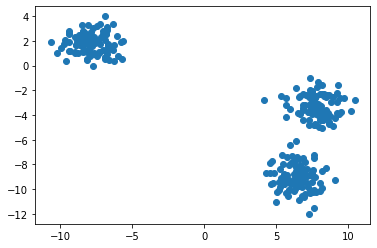

In [133]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

##import

In [134]:
from sklearn.cluster import KMeans

##Define

In [135]:
KMclust = KMeans(n_clusters=5)

##Train

In [136]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [137]:
label = KMclust.predict(X)

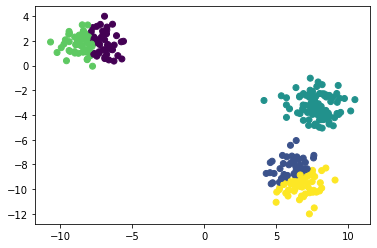

In [138]:
plt.scatter(X[:, 0],X[:, 1], c=label)

##Color quantization (application of kmean)

In [139]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
import cv2
import os

In [141]:
img = cv2.imread(os.path.join(path,'beautiful-mandrill-portrait-closeup-baboon-260nw-1242657010.webp'))

In [142]:
img

array([[[ 72,  80,  69],
        [ 72,  80,  69],
        [ 70,  81,  68],
        ...,
        [ 52,  52,  45],
        [ 52,  52,  45],
        [ 52,  52,  45]],

       [[ 67,  75,  65],
        [ 67,  75,  65],
        [ 65,  76,  63],
        ...,
        [ 52,  52,  45],
        [ 52,  52,  45],
        [ 52,  52,  45]],

       [[ 67,  75,  65],
        [ 67,  75,  65],
        [ 65,  76,  63],
        ...,
        [ 52,  52,  45],
        [ 52,  52,  45],
        [ 52,  52,  45]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

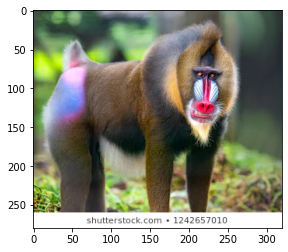

In [143]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [144]:
RGB_img.shape

(280, 320, 3)

##Coun unique colors

In [145]:
import numpy as np

In [146]:
np.unique(RGB_img).shape

(256,)

##Use K-mwan to reduce color from 256 colors to B colors

In [147]:
#Define
myQuantize = KMeans(n_clusters=8)



In [156]:
img_row = np.reshape(RGB_img,(280*320,3))
img_row

array([[ 69,  80,  72],
       [ 69,  80,  72],
       [ 68,  81,  70],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [157]:
#Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [158]:
#Predict
res = myQuantize.predict(img_row)

In [159]:
res

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

##Get cluster centers

In [163]:
Clust_cen = myQuantize.cluster_centers_
Clust_cen

array([[161.88446927, 194.21385475,  72.36156425],
       [ 61.58751493,  61.63744524,  51.29684389],
       [249.60860273, 247.19837029, 249.57039808],
       [166.04309412, 163.83681933, 195.25640101],
       [136.18349232, 135.07704028, 109.85830684],
       [ 27.79895773,  30.95807759,  22.6477128 ],
       [184.02363434, 186.43768116, 139.75172798],
       [ 98.36598632,  97.15131579,  73.48088479]])

##Map color name back to image

In [164]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]